# 프로젝트: OCR 모델 비교
* OCR 구현방법: google-api, Keras-ocr, 테서랙트

## 개념  
### 1. OCR: Localization과 Recognition 
### 2. Object Detection: Localization과 Recognition

## Localization
### 자유도 기준
* RECT(자유도 4)
* RBOX(자유도 5)
* QUAD(자유도 8)
* POLY 

### 구현 방법 
* Regression-based(object detection) >> "unstable"
* Classification-based(semantic segmentation) >> "stable"
* end-to-end

## Recognition 
### 구현 방법 
* Text spotting 
* CTC-basedd
* Attention-based

## 루브릭
### 딥러닝 기반 객체 검출 방법 
#### Regression(회귀)
#### Segmentation

1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?
    - 목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.
2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?
    - 평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.
3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?
    - 최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.

In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
## 설치 필요한 라이브러리/패키지
# !pip install --upgrade google-api-python-client
# !pip install google-cloud-vision
# !pip install keras-ocr

In [3]:
import os
import cv2 # images load 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

## Step1. 검증용 데이터셋 준비

In [4]:
img_path = os.getenv('HOME') + '/aiffel/ocr_python/image/'

In [5]:
# file list 확인
file_list = os.listdir(img_path)

for file in file_list:
    print(file)

neon_kor.jpg
vertical_kor.jpg
vertical_eng.jpg
horizon_eng.jpg
horizon_ch.jpg
neon_eng.jpg
horizon_kor.jpg
horizon_jp.jpg


In [6]:
images = []

for file in file_list:
    img = cv2.imread(img_path + str(file))
    if img is not None:
        images.append(img)

In [7]:
lst = [1,2,3]
lst.index(1)

0

In [8]:
type(images), len(images), images.index(img)

(list, 8, 7)

In [9]:
file_list[images.index(img)]

'horizon_jp.jpg'

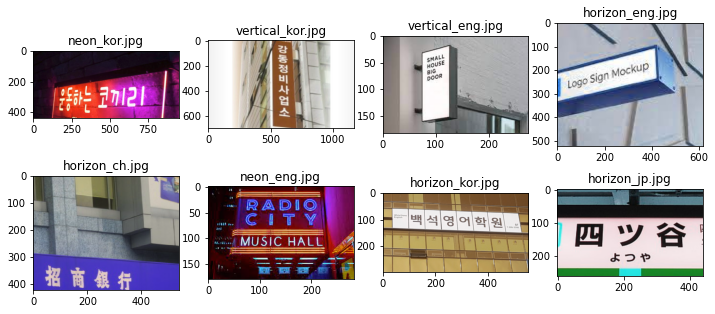

In [10]:
fig = plt.figure(figsize = (12, 5))
grid_row = 2

for file in file_list: # images에서 image 하나씩 가져오기
    if file.split('.')[-1] == 'jpg':
        idx = file_list.index(file)
        img = cv2.imread(img_path + '/' + file)
        ax = fig.add_subplot(2, 4, idx+1)
        ax = fig.add_subplot(grid_row,len(images)/grid_row, idx+1)
        imgplot = plt.imshow(img)
        ax.set_title(file_list[idx])

## Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

### 1. Google OCR API 사용

In [11]:
# API 사용 
from google.cloud import vision
import io
    
def detect_text(path):
    """Detects text in the file."""
    file
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [12]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

-rw-rw-r-- 1 aiffel-dj19 aiffel-dj19 2343  3월 23 10:59 /home/aiffel-dj19/aiffel/ocr_python/my_google_api_key.json


In [13]:
# # keras-ocr, pretrained-model의 사용 tf 버전 = 2.2.0 
# !pip uninstall tensorflow-gpu -y
# !pip uninstall tensorflow -y 
# !pip install tensorflow-gpu==2.2.0 -y  

In [14]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

In [15]:
for file in file_list:
    print(file)
    print()
    detect_text(img_path + '/' + file)
    print('=======================================')

neon_kor.jpg

Texts:

"운동하는 코끼리
"

"운동"

"하는"

"코끼리"
bounds: (417,234),(675,222),(681,362),(424,374)
vertical_kor.jpg

Texts:

"강동정비사업소
"

"강동"

"정비"

"사업소"
bounds: (557,362),(644,360),(650,615),(563,617)
vertical_eng.jpg

Texts:

"SMALL
HOUSE
BIG
DOOR
"

"SMALL"

"HOUSE"

"BIG"

"DOOR"
bounds: (82,76),(109,70),(111,78),(84,84)
horizon_eng.jpg

Texts:

"Lago Sign Mockup
"

"Lago"

"Sign"

"Mockup"
bounds: (227,199),(384,160),(395,202),(237,241)
horizon_ch.jpg

Texts:

"招商银行
"

"招商"

"银行"
bounds: (229,345),(364,352),(360,421),(225,414)
neon_eng.jpg

Texts:

"RADIO
CITY
MUSIC HALL
"

"RADIO"

"CITY"

"MUSIC"

"HALL"
bounds: (155,98),(223,98),(223,118),(155,118)
horizon_kor.jpg

Texts:

"백석|영 어학 원
WhiteStone
English
6F
T.299-3390
"

"백석"

"|"

"영"

"어학"

"원"

"WhiteStone"

"English"

"6F"

"T.299-3390"
bounds: (470,127),(514,128),(514,133),(470,132)
horizon_jp.jpg

Texts:

"|四ツ谷
よつや
"

"|"

"四ツ谷"

"よつや"
bounds: (161,193),(281,193),(281,219),(161,219)


* Error Report 
UnboundLocalError: local variable 'text' referenced before assignment
    
위와 같은 오류가 뜨는 경우는 ocr api가 결과물을 내지 못 하는 경우이다. 이미지를 바꿔주는 수 밖에 없었다. 다른 언어는 괜찮았는데 일본어 같은 경우 글씨가 굵거나 알아보기 힘든 간판이 많아서 구분에 어려움이 있는 간판이 많았다. 

### 2. keras-ocr 사용

In [16]:
import matplotlib.pyplot as plt
import keras_ocr

with tf.device('/gpu:0'):
    # keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
    pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj19/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel-dj19/.keras-ocr/crnn_kurapan.h5


In [17]:
!cp /home/aiffel-dj19/.keras-ocr/crnn_kurapan.h5 ~/aiffel/ocr_python/crnn_kurapan.h5
!cp /home/aiffel-dj19/.keras-ocr/craft_mlt_25k.h5 ~/aiffel/ocr_python/craft_mlt_25k.h5

공식문서를 가서 read 함수가 keras-ocr 라이브러리에서 입력을 무엇으로 받는지 확인 가능하다. 코드를 보면, if문으로 url인지, file인지 확인한다. 따라서 로컬 경로가 들어가도 되고, 이미지 링크가 입력으로 들어가도 괜찮다. 
* keras-ocr 공식문서 링크: https://keras-ocr.readthedocs.io/en/latest/_modules/keras_ocr/tools.html

```
def read(filepath_or_buffer: typing.Union[str, io.BytesIO]):
    """Read a file into an image object

    Args:
        filepath_or_buffer: The path to the file, a URL, or any object
            with a `read` method (such as `io.BytesIO`)
    """
    if isinstance(filepath_or_buffer, np.ndarray):
        return filepath_or_buffer
    if hasattr(filepath_or_buffer, 'read'):
        image = np.asarray(bytearray(filepath_or_buffer.read()), dtype=np.uint8)
        image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)
    elif isinstance(filepath_or_buffer, str):
        if validators.url(filepath_or_buffer):
            return read(urllib.request.urlopen(filepath_or_buffer))
        assert os.path.isfile(filepath_or_buffer), \
            'Could not find image at path: ' + filepath_or_buffer
        image = cv2.imread(filepath_or_buffer)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
```

In [18]:
img_path_list = []

for file in file_list:
    img_path_list.append(img_path + file)
img_path_list

['/home/aiffel-dj19/aiffel/ocr_python/image/neon_kor.jpg',
 '/home/aiffel-dj19/aiffel/ocr_python/image/vertical_kor.jpg',
 '/home/aiffel-dj19/aiffel/ocr_python/image/vertical_eng.jpg',
 '/home/aiffel-dj19/aiffel/ocr_python/image/horizon_eng.jpg',
 '/home/aiffel-dj19/aiffel/ocr_python/image/horizon_ch.jpg',
 '/home/aiffel-dj19/aiffel/ocr_python/image/neon_eng.jpg',
 '/home/aiffel-dj19/aiffel/ocr_python/image/horizon_kor.jpg',
 '/home/aiffel-dj19/aiffel/ocr_python/image/horizon_jp.jpg']

In [19]:
keras_ocr.tools.read(img_path_list[0]).shape # image file 불러오는지 확인

(438, 954, 3)

In [20]:
images = [keras_ocr.tools.read(img) for img in img_path_list]

In [21]:
prediction_groups = [pipeline.recognize([img]) for img in img_path_list]

In [22]:
len(images)

8

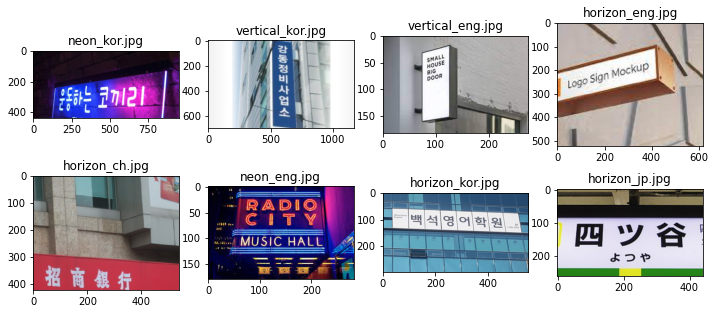

In [23]:
# 입력 적절히 잘 받았는지 확인 
fig = plt.figure(figsize = (12, 5))
grid_row = 2

for img in images: # images에서 image 하나씩 가져오기
    idx = images.index(img)
    ax = fig.add_subplot(grid_row,len(images)/grid_row, idx+1)
    imgplot = plt.imshow(img)
    ax.set_title(file_list[idx])

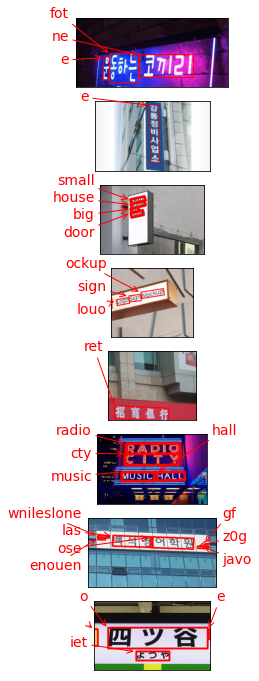

In [24]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(12, 12))

for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

* 위처럼 영어가 아닌 언어들에 대해, 글자는 detection하지만, 언어의 매칭이 잘못되고 있음을 알 수 있다. 이와 같은 오류는, recognizer를 설정할때, 

* 한국어 인식하기 위한 알파벳 셋팅
* 참고 링크: https://keras-ocr.readthedocs.io/en/latest/examples/end_to_end_training.html?highlight=alphabet#build-base-detector-and-recognizer-models
```
alphabet = string.digits + string.ascii_letters + '!?. '
recognizer_alphabet = ''.join(sorted(set(alphabet.lower())))

recognizer = keras_ocr.recognition.Recognizer(
    alphabet=recognizer_alphabet,
    weights='kurapan'
)
```
* 위와 같은 코드에서 alphabet에 들어가는 string에 한국어를 추가하면 된다. 
```
alphabet = string.digits + string.ascii_letters + '!?.'+'가각간갇갈갉갊감갑값갓갔강갖갗같갚갛개객갠갤갬갭갯갰갱갸갹갼걀걋걍걔걘걜거걱건걷걸걺검겁것겄겅겆겉겊겋게겐겔겜겝겟겠겡겨격겪견겯결겸겹겻겼경곁계곈곌곕곗고곡곤곧골곪곬곯곰곱곳공곶과곽관괄괆괌괍괏광괘괜괠괩괬괭괴괵괸괼굄굅굇굉교굔굘굡굣구국군굳굴굵굶굻굼굽굿궁궂궈궉권궐궜궝궤궷귀귁귄귈귐귑귓규균귤그극근귿글긁금급긋긍긔기긱긴긷길긺김깁깃깅깆깊까깍깎깐깔깖깜깝깟깠깡깥깨깩깬깰깸깹깻깼깽꺄꺅꺌꺼꺽꺾껀껄껌껍껏껐껑께껙껜껨껫껭껴껸껼꼇꼈꼍꼐꼬꼭꼰꼲꼴꼼꼽꼿꽁꽂꽃꽈꽉꽐꽜꽝꽤꽥꽹꾀꾄꾈꾐꾑꾕꾜꾸꾹꾼꿀꿇꿈꿉꿋꿍꿎꿔꿜꿨꿩꿰꿱꿴꿸뀀뀁뀄뀌뀐뀔뀜뀝뀨끄끅끈끊끌끎끓끔끕끗끙끝끼끽낀낄낌낍낏낑나낙낚난낟날낡낢남납낫났낭낮낯낱낳내낵낸낼냄냅냇냈냉냐냑냔냘냠냥너넉넋넌널넒넓넘넙넛넜넝넣네넥넨넬넴넵넷넸넹녀녁년녈념녑녔녕녘녜녠노녹논놀놂놈놉놋농높놓놔놘놜놨뇌뇐뇔뇜뇝뇟뇨뇩뇬뇰뇹뇻뇽누눅눈눋눌눔눕눗눙눠눴눼뉘뉜뉠뉨뉩뉴뉵뉼늄늅늉느늑는늘늙늚늠늡늣능늦늪늬늰늴니닉닌닐닒님닙닛닝닢다닥닦단닫달닭닮닯닳담답닷닸당닺닻닿대댁댄댈댐댑댓댔댕댜더덕덖던덛덜덞덟덤덥덧덩덫덮데덱덴델뎀뎁뎃뎄뎅뎌뎐뎔뎠뎡뎨뎬도독돈돋돌돎돐돔돕돗동돛돝돠돤돨돼됐되된될됨됩됫됴두둑둔둘둠둡둣둥둬뒀뒈뒝뒤뒨뒬뒵뒷뒹듀듄듈듐듕드득든듣들듦듬듭듯등듸디딕딘딛딜딤딥딧딨딩딪따딱딴딸땀땁땃땄땅땋때땍땐땔땜땝땟땠땡떠떡떤떨떪떫떰떱떳떴떵떻떼떽뗀뗄뗌뗍뗏뗐뗑뗘뗬또똑똔똘똥똬똴뙈뙤뙨뚜뚝뚠뚤뚫뚬뚱뛔뛰뛴뛸뜀뜁뜅뜨뜩뜬뜯뜰뜸뜹뜻띄띈띌띔띕띠띤띨띰띱띳띵라락란랄람랍랏랐랑랒랖랗래랙랜랠램랩랫랬랭랴략랸럇량러럭런럴럼럽럿렀렁렇레렉렌렐렘렙렛렝려력련렬렴렵렷렸령례롄롑롓로록론롤롬롭롯롱롸롼뢍뢨뢰뢴뢸룀룁룃룅료룐룔룝룟룡루룩룬룰룸룹룻룽뤄뤘뤠뤼뤽륀륄륌륏륑류륙륜률륨륩륫륭르륵른를름릅릇릉릊릍릎리릭린릴림립릿링마막만많맏말맑맒맘맙맛망맞맡맣매맥맨맬맴맵맷맸맹맺먀먁먈먕머먹먼멀멂멈멉멋멍멎멓메멕멘멜멤멥멧멨멩며멱면멸몃몄명몇몌모목몫몬몰몲몸몹못몽뫄뫈뫘뫙뫼묀묄묍묏묑묘묜묠묩묫무묵묶문묻물묽묾뭄뭅뭇뭉뭍뭏뭐뭔뭘뭡뭣뭬뮈뮌뮐뮤뮨뮬뮴뮷므믄믈믐믓미믹민믿밀밂밈밉밋밌밍및밑바박밖밗반받발밝밞밟밤밥밧방밭배백밴밸뱀뱁뱃뱄뱅뱉뱌뱍뱐뱝버벅번벋벌벎범법벗벙벚베벡벤벧벨벰벱벳벴벵벼벽변별볍볏볐병볕볘볜보복볶본볼봄봅봇봉봐봔봤봬뵀뵈뵉뵌뵐뵘뵙뵤뵨부북분붇불붉붊붐붑붓붕붙붚붜붤붰붸뷔뷕뷘뷜뷩뷰뷴뷸븀븃븅브븍븐블븜븝븟비빅빈빌빎빔빕빗빙빚빛빠빡빤빨빪빰빱빳빴빵빻빼빽뺀뺄뺌뺍뺏뺐뺑뺘뺙뺨뻐뻑뻔뻗뻘뻠뻣뻤뻥뻬뼁뼈뼉뼘뼙뼛뼜뼝뽀뽁뽄뽈뽐뽑뽕뾔뾰뿅뿌뿍뿐뿔뿜뿟뿡쀼쁑쁘쁜쁠쁨쁩삐삑삔삘삠삡삣삥사삭삯산삳살삵삶삼삽삿샀상샅새색샌샐샘샙샛샜생샤샥샨샬샴샵샷샹섀섄섈섐섕서석섞섟선섣설섦섧섬섭섯섰성섶세섹센셀셈셉셋셌셍셔셕션셜셤셥셧셨셩셰셴셸솅소속솎손솔솖솜솝솟송솥솨솩솬솰솽쇄쇈쇌쇔쇗쇘쇠쇤쇨쇰쇱쇳쇼쇽숀숄숌숍숏숑수숙순숟술숨숩숫숭숯숱숲숴쉈쉐쉑쉔쉘쉠쉥쉬쉭쉰쉴쉼쉽쉿슁슈슉슐슘슛슝스슥슨슬슭슴습슷승시식신싣실싫심십싯싱싶싸싹싻싼쌀쌈쌉쌌쌍쌓쌔쌕쌘쌜쌤쌥쌨쌩썅써썩썬썰썲썸썹썼썽쎄쎈쎌쏀쏘쏙쏜쏟쏠쏢쏨쏩쏭쏴쏵쏸쐈쐐쐤쐬쐰쐴쐼쐽쑈쑤쑥쑨쑬쑴쑵쑹쒀쒔쒜쒸쒼쓩쓰쓱쓴쓸쓺쓿씀씁씌씐씔씜씨씩씬씰씸씹씻씽아악안앉않알앍앎앓암압앗았앙앝앞애액앤앨앰앱앳앴앵야약얀얄얇얌얍얏양얕얗얘얜얠얩어억언얹얻얼얽얾엄업없엇었엉엊엌엎에엑엔엘엠엡엣엥여역엮연열엶엷염엽엾엿였영옅옆옇예옌옐옘옙옛옜오옥온올옭옮옰옳옴옵옷옹옻와왁완왈왐왑왓왔왕왜왝왠왬왯왱외왹왼욀욈욉욋욍요욕욘욜욤욥욧용우욱운울욹욺움웁웃웅워웍원월웜웝웠웡웨웩웬웰웸웹웽위윅윈윌윔윕윗윙유육윤율윰윱윳융윷으윽은을읊음읍읏응읒읓읔읕읖읗의읜읠읨읫이익인일읽읾잃임입잇있잉잊잎자작잔잖잗잘잚잠잡잣잤장잦재잭잰잴잼잽잿쟀쟁쟈쟉쟌쟎쟐쟘쟝쟤쟨쟬저적전절젊점접젓정젖제젝젠젤젬젭젯젱져젼졀졈졉졌졍졔조족존졸졺좀좁좃종좆좇좋좌좍좔좝좟좡좨좼좽죄죈죌죔죕죗죙죠죡죤죵주죽준줄줅줆줌줍줏중줘줬줴쥐쥑쥔쥘쥠쥡쥣쥬쥰쥴쥼즈즉즌즐즘즙즛증지직진짇질짊짐집짓징짖짙짚짜짝짠짢짤짧짬짭짯짰짱째짹짼쨀쨈쨉쨋쨌쨍쨔쨘쨩쩌쩍쩐쩔쩜쩝쩟쩠쩡쩨쩽쪄쪘쪼쪽쫀쫄쫌쫍쫏쫑쫓쫘쫙쫠쫬쫴쬈쬐쬔쬘쬠쬡쭁쭈쭉쭌쭐쭘쭙쭝쭤쭸쭹쮜쮸쯔쯤쯧쯩찌찍찐찔찜찝찡찢찧차착찬찮찰참찹찻찼창찾채책챈챌챔챕챗챘챙챠챤챦챨챰챵처척천철첨첩첫첬청체첵첸첼쳄쳅쳇쳉쳐쳔쳤쳬쳰촁초촉촌촐촘촙촛총촤촨촬촹최쵠쵤쵬쵭쵯쵱쵸춈추축춘출춤춥춧충춰췄췌췐취췬췰췸췹췻췽츄츈츌츔츙츠측츤츨츰츱츳층치칙친칟칠칡침칩칫칭카칵칸칼캄캅캇캉캐캑캔캘캠캡캣캤캥캬캭컁커컥컨컫컬컴컵컷컸컹케켁켄켈켐켑켓켕켜켠켤켬켭켯켰켱켸코콕콘콜콤콥콧콩콰콱콴콸쾀쾅쾌쾡쾨쾰쿄쿠쿡쿤쿨쿰쿱쿳쿵쿼퀀퀄퀑퀘퀭퀴퀵퀸퀼큄큅큇큉큐큔큘큠크큭큰클큼큽킁키킥킨킬킴킵킷킹타탁탄탈탉탐탑탓탔탕태택탠탤탬탭탯탰탱탸턍터턱턴털턺텀텁텃텄텅테텍텐텔템텝텟텡텨텬텼톄톈토톡톤톨톰톱톳통톺톼퇀퇘퇴퇸툇툉툐투툭툰툴툼툽툿퉁퉈퉜퉤튀튁튄튈튐튑튕튜튠튤튬튱트특튼튿틀틂틈틉틋틔틘틜틤틥티틱틴틸팀팁팃팅파팍팎판팔팖팜팝팟팠팡팥패팩팬팰팸팹팻팼팽퍄퍅퍼퍽펀펄펌펍펏펐펑페펙펜펠펨펩펫펭펴편펼폄폅폈평폐폘폡폣포폭폰폴폼폽폿퐁퐈퐝푀푄표푠푤푭푯푸푹푼푿풀풂품풉풋풍풔풩퓌퓐퓔퓜퓟퓨퓬퓰퓸퓻퓽프픈플픔픕픗피픽핀필핌핍핏핑하학한할핥함합핫항해핵핸핼햄햅햇했행햐향허헉헌헐헒험헙헛헝헤헥헨헬헴헵헷헹혀혁현혈혐협혓혔형혜혠혤혭호혹혼홀홅홈홉홋홍홑화확환활홧황홰홱홴횃횅회획횐횔횝횟횡효횬횰횹횻후훅훈훌훑훔훗훙훠훤훨훰훵훼훽휀휄휑휘휙휜휠휨휩휫휭휴휵휸휼흄흇흉흐흑흔흖흗흘흙흠흡흣흥흩희흰흴흼흽힁히힉힌힐힘힙힛힝'
```

In [25]:
lang = []

# 이미지 파일 언어 확인해볼 수 있긴함.
for file in file_list:
    filtered1 = file.split('_')
    filtered2 = filtered1[-1].split('.')
    lang.append(filtered2[-2])
lang

['kor', 'kor', 'eng', 'eng', 'ch', 'eng', 'kor', 'jp']

### 3. Tesseract OCR 사용

In [91]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path, output_path, LANG):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang= LANG,    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width백석|영 어학 원,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [92]:
en_idx = [i for i, img in enumerate(lang) if img == 'eng']
en_idx

[2, 3, 5]

In [93]:
kor_idx = [i for i, img in enumerate(lang) if img == 'kor']
kor_idx

[0, 1, 6]

In [94]:
arrange = []

# 이미지 파일 언어 확인해볼 수 있긴함.
for file in file_list:
    filtered1 = file.split('_')
    arrange.append(filtered1[0])
arrange백석|영 어학 원

['neon',
 'vertical',
 'vertical',
 'horizon',
 'horizon',
 'neon',
 'horizon',
 'horizon']

In [95]:
output_path = os.getenv('HOME') + '/aiffel/ocr_python/output'

In [121]:
test_img = img_path + '/horizon_eng.jpg'

In [122]:
# 파일명에서 언어 유형 선택 
filtered1 = test_img.split('_')
filtered2 = filtered1[-1].split('.')
LANG = filtered2[-2]
LANG

'eng'

In [123]:
cropped_image_path_list = crop_word_regions(test_img, output_path, LANG)

/home/aiffel-dj19/aiffel/ocr_python/output/0000.png
/home/aiffel-dj19/aiffel/ocr_python/output/0001.png
/home/aiffel-dj19/aiffel/ocr_python/output/0002.png


* SystemError: tile cannot extend outside image
이미지에 대한 Detection이 이뤄지지 않을때 setimage에서부터 error가 뜬다. 

In [124]:
cropped_image_path_list

['/home/aiffel-dj19/aiffel/ocr_python/output/0000.png',
 '/home/aiffel-dj19/aiffel/ocr_python/output/0001.png',
 '/home/aiffel-dj19/aiffel/ocr_python/output/0002.png']

* vertical한 배치를 가지는 간판은 Tesseract가 인지 불가능 
```
/home/aiffel-dj19/aiffel/ocr_python/image/vertical_kor.jpg
5
1
2
3
4
5
0 0 0 443 # 결과에 crop할 수 없게끔 나옴. 
```

In [125]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng', 백석|영 어학 원   # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [126]:
recognize_images(cropped_image_path_list)

SLIPPERY

WHEN

WET

Done


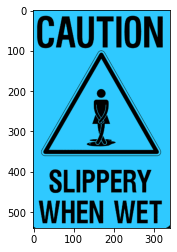

In [127]:
# 입력 적절히 잘 받았는지 확인 
imgplot = plt.imshow(cv2.imread(test_img))

In [128]:
test_img = img_path + '/horizon_kor.jpg'

In [129]:
# 파일명에서 언어 유형 선택 
filtered1 = test_img.split('_')
filtered2 = filtered1[-1].split('.')
LANG = filtered2[-2]
LANG

'kor'

In [130]:
cropped_image_path_list = crop_word_regions(test_img, output_path, LANG)

/home/aiffel-dj19/aiffel/ocr_python/output/0000.png


* SystemError: tile cannot extend outside image
이미지에 대한 Detection이 이뤄지지 않을때 setimage에서부터 error가 뜬다. 

In [131]:
cropped_image_path_list

['/home/aiffel-dj19/aiffel/ocr_python/output/0000.png']

* vertical한 배치를 가지는 간판은 Tesseract가 인지 불가능 
```
/home/aiffel-dj19/aiffel/ocr_python/image/vertical_kor.jpg
5
1
2
3
4
5
0 0 0 443 # 결과에 crop할 수 없게끔 나옴. 
```

In [132]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang= LANG,    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [133]:
recognize_images(cropped_image_path_list)

다

Done


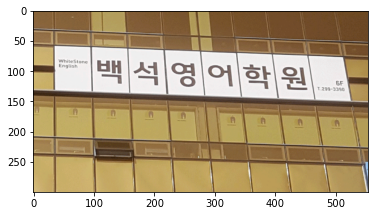

In [134]:
# 입력 적절히 잘 받았는지 확인 
imgplot = plt.imshow(cv2.imread(test_img))

## Step3. 테스트 결과 정리

## Step4. 결과 분석과 결론 제시

## 구현 서비스
여행지 식당명 안내기 

## 구현 목적 
외국 여행 중에 밥을 먹으러 갈 때 식당 이름을 알려주기 위한 서비스 

## 서비스 내용 
식당 간판을 사진에 담으면 식당명을 OCR 모델을 통해 추출하고, 이를 구글 검색이나, 지도 검색에서 활용할 수 있도록 한다. 

## 평가기준 
여러 언어를 입력 셋으로 뒀을 때 해당 모델이 잘 동작하는지 확인한다. 그리고, 세로 간판, 가로 간판일 경우와 이외에도 네온사인 간판에 있어서도 잘 동작하는지 확인한다. 
* 언어: 영어, 한국어, 일본어, 중국어 
* 간판 종류: 세로 간판, 가로 간판, 네온사인 간판 

단어에 대한 복원률을 실제 간판 이름의 글자별 개수 중 동일한 문자 개수의 비중을 구하여 판단한다. 
* 복원정도의 판단 기준: OCR 모델 결과물과 실제 간판간의 동일한 문자 개수/ 실제 간판의 문자 개수 => 해당 기준을 두었지만, 실질적으로 API와 성능 차가 심하다. 

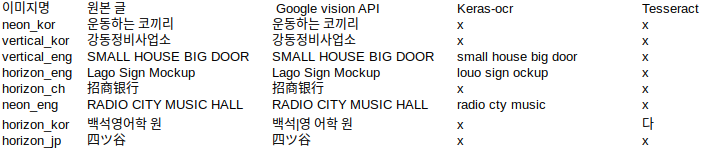

## 회고 
세가지 방법을 비교했을때, 역시 갓구글이라는 생각을 할 수 있었다. 예시 서비스로서 간판을 안내해주는 서비스를 생각해봤는데, OCR이 좀더 명확해지면, 시각장애인 분들이나, 언어에 어려움을 겪는 여행객들도 자유롭게 해외여행에서 식당을 이용할 수 있지 않을까라는 생각이 들었다.    